In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

2024-07-14 22:03:26.536066: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-14 22:03:26.542918: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-14 22:03:26.560700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-14 22:03:26.590148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-14 22:03:26.598665: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-14 22:03:26.623116: I tensorflow/core/platform/cpu_feature_gu

In [2]:
stock_data = yf.download('NVDA', start='2015-01-01', end='2024-07-01')
stock_data.shape, stock_data.head()

[*********************100%%**********************]  1 of 1 completed


((2388, 6),
                Open     High      Low    Close  Adj Close     Volume
 Date                                                                
 2015-01-02  0.50325  0.50700  0.49525  0.50325   0.483218  113680000
 2015-01-05  0.50325  0.50475  0.49250  0.49475   0.475057  197952000
 2015-01-06  0.49550  0.49600  0.47925  0.47975   0.460654  197764000
 2015-01-07  0.48325  0.48750  0.47700  0.47850   0.459453  321808000
 2015-01-08  0.48400  0.49950  0.48375  0.49650   0.476737  283780000)

In [3]:
data = stock_data['Close'].values.reshape(-1, 1)
data.shape

(2388, 1)

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

split = int(np.ceil(len(scaled_data)*0.8))
X_train_raw = scaled_data[0:split, :]
X_test_raw = scaled_data[split-60:, :]

In [5]:
X_train_raw.shape, X_test_raw.shape

((1911, 1), (537, 1))

In [6]:
def create_dataset(dataset, n_step=60):
    X, y = [], []
    for i in range(len(dataset) - n_step - 1):
        X.append(dataset[i:(i + n_step), 0])
        y.append(dataset[i + n_step, 0])
    return np.array(X), np.array(y)

In [7]:
X_train, y_train = create_dataset(X_train_raw)
X_test, y_test = create_dataset(X_test_raw)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1850, 60), (1850,), (476, 60), (476,))

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1850, 60, 1), (476, 60, 1))

In [9]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(60, 1)))
model.add(Dense(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/home/aditya/crux-dev-summer-group/dev-summer-group-2024/Machine Learning/virtualenv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.fit(X_train, y_train, batch_size=1, epochs=1)


1850/1850 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 2.2253e-04


In [11]:
predictions = model.predict(X_test)
predictions

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.13264169],
       [0.1304911 ],
       [0.12325989],
       [0.11696368],
       [0.12068073],
       [0.12425845],
       [0.1230354 ],
       [0.12772313],
       [0.12869127],
       [0.12522368],
       [0.12780218],
       [0.12536432],
       [0.11328693],
       [0.11361822],
       [0.11817724],
       [0.11834569],
       [0.11576119],
       [0.10543466],
       [0.1014166 ],
       [0.10069855],
       [0.0930865 ],
       [0.08550277],
       [0.082857  ],
       [0.08722371],
       [0.09078937],
       [0.091511  ],
       [0.09210457],
       [0.08925896],
       [0.08363375],
       [0.08383743],
       [0.08447628],
       [0.0852671 ],
       [0.08668107],
       [0.0825639 ],
       [0.08235452],
       [0.08062363],
       [0.07799141],
       [0.07602199],
       [0.07788254],
       [0.07909763],
       [0.07582583],
       [0.07831147],
       [0.08456847],
       [0.08570351],
       [0.08306586],
       [0.07791225],
       [0.07214411],
       [0.073

In [12]:
predictions = scaler.inverse_transform(predictions)
predictions

array([[ 18.398592 ],
       [ 18.108044 ],
       [ 17.131096 ],
       [ 16.28047  ],
       [ 16.782648 ],
       [ 17.266003 ],
       [ 17.100767 ],
       [ 17.734087 ],
       [ 17.864883 ],
       [ 17.396408 ],
       [ 17.744766 ],
       [ 17.415407 ],
       [ 15.783735 ],
       [ 15.828492 ],
       [ 16.444424 ],
       [ 16.46718  ],
       [ 16.118011 ],
       [ 14.72288  ],
       [ 14.180036 ],
       [ 14.083026 ],
       [ 13.0546255],
       [ 12.030052 ],
       [ 11.672605 ],
       [ 12.262554 ],
       [ 12.744281 ],
       [ 12.841773 ],
       [ 12.921966 ],
       [ 12.537519 ],
       [ 11.777546 ],
       [ 11.805063 ],
       [ 11.891372 ],
       [ 11.998214 ],
       [ 12.189242 ],
       [ 11.633007 ],
       [ 11.60472  ],
       [ 11.370874 ],
       [ 11.015257 ],
       [ 10.749186 ],
       [ 11.000547 ],
       [ 11.164708 ],
       [ 10.722683 ],
       [ 11.058496 ],
       [ 11.903828 ],
       [ 12.057174 ],
       [ 11.700823 ],
       [ 1

In [13]:
real_stock_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
real_stock_prices

array([[ 18.98900032],
       [ 17.79299927],
       [ 17.08600044],
       [ 18.09700012],
       [ 17.94199944],
       [ 18.70899963],
       [ 19.03199959],
       [ 18.87899971],
       [ 18.33499908],
       [ 18.77300072],
       [ 17.84900093],
       [ 17.0340004 ],
       [ 17.18099976],
       [ 17.22200012],
       [ 17.91300011],
       [ 16.26000023],
       [ 15.80099964],
       [ 15.46800041],
       [ 15.09399986],
       [ 13.93700027],
       [ 13.64700031],
       [ 13.46500015],
       [ 13.71399975],
       [ 13.98999977],
       [ 14.38700008],
       [ 14.50500011],
       [ 13.13099957],
       [ 13.12800026],
       [ 12.9289999 ],
       [ 13.19799995],
       [ 13.38199997],
       [ 13.17599964],
       [ 13.26099968],
       [ 12.56099987],
       [ 12.51599979],
       [ 12.22799969],
       [ 12.41300011],
       [ 12.73600006],
       [ 12.22000027],
       [ 12.13899994],
       [ 12.51200008],
       [ 13.16699982],
       [ 13.20899963],
       [ 13

In [14]:
stock_data[split:].shape

(477, 6)

/tmp/ipykernel_73087/3477777832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


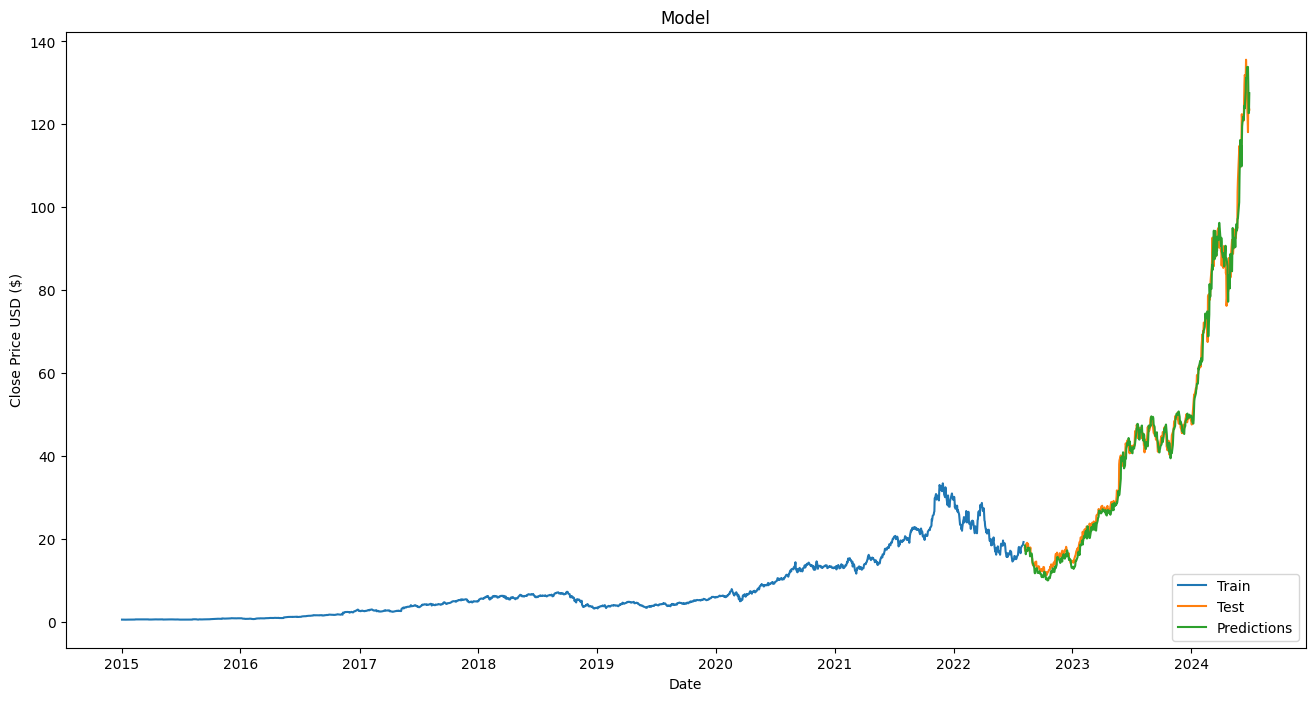

In [19]:
import matplotlib.pyplot as plt

train = stock_data[:split]
test = stock_data[split+1:]
test['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

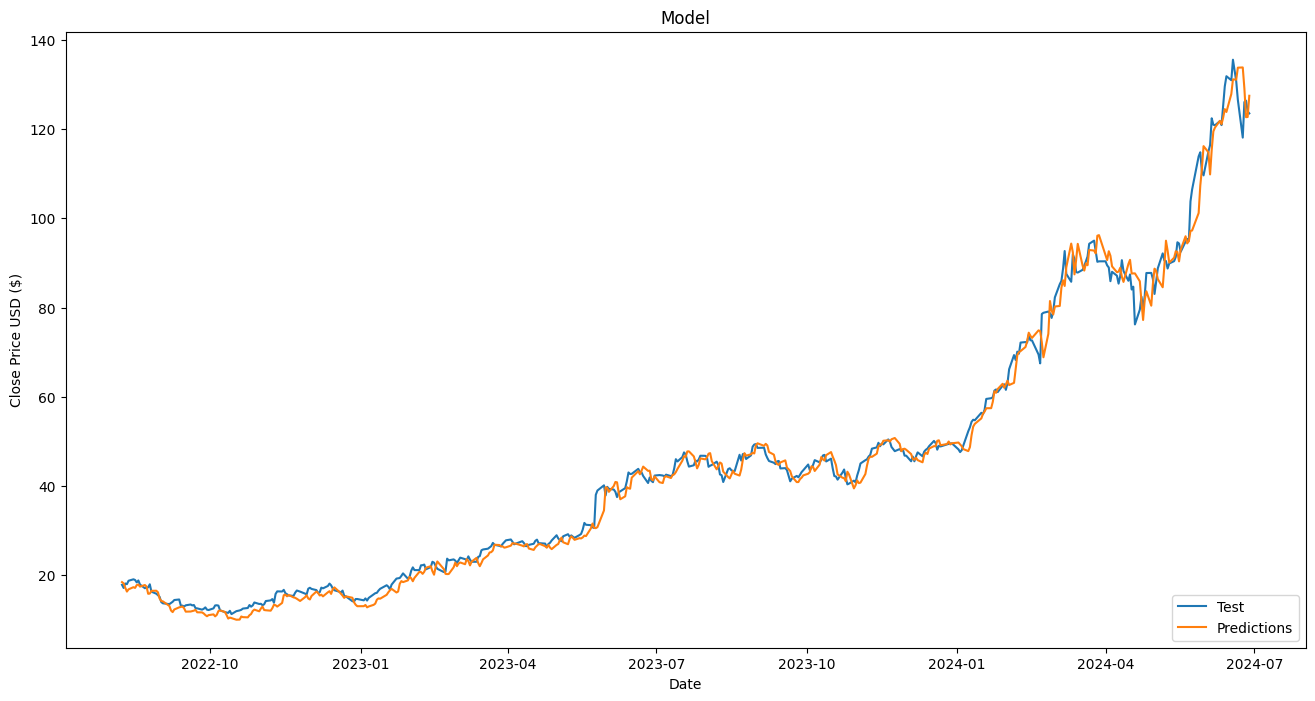

In [20]:
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Test', 'Predictions'], loc='lower right')
plt.show()